In [57]:
#Azure for Students and free trial accounts often lack AutoML code generation due to limited compute quotas, 
#restricted workspace features, and regional rollout limitations, which prioritize commercial environments over educational or sandbox tiers.
#So, AutoML process fully explain on report and implementation guide.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Loading the dataset in to dataframe
file_path = 'retail_data.csv'
df = pd.read_csv(file_path)
df


,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,39,Female,Low,No,1,Yes,Married,4,High School,...,10.55,Yes,Spring,No,5,Yes,Low,75,High,163
999996,999997,77,Female,Low,No,4,Yes,Single,2,Master's,...,8.08,Yes,Winter,No,5,No,Low,60,Low,12
999997,999998,67,Male,Medium,No,7,Yes,Single,3,Bachelor's,...,87.26,Yes,Summer,Yes,17,No,High,14,Medium,118
999998,999999,36,Male,Low,Yes,1,Yes,Divorced,2,High School,...,94.17,Yes,Winter,No,13,Yes,Medium,87,High,240


In [ ]:
#cleaned dataset for regression task 

In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Load the Dataset
# ----------------------------
file_path = 'retail_data.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

print("Initial shape:", df.shape)
display(df.head())

# ----------------------------
# Null Value Summary
# ----------------------------
print("\nMissing value count per column:")
print(df.isnull().sum())

# ----------------------------
# Drop Columns with Too Many Nulls
# ----------------------------
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

# Fill numerical columns with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows with critical fields missing
if 'Product_ID' in df.columns and 'Total_Sales' in df.columns:
    df.dropna(subset=['Product_ID', 'Total_Sales'], inplace=True)

# ----------------------------
# Remove Duplicates
# ----------------------------
df.drop_duplicates(inplace=True)

# ----------------------------
# Rename Columns
# ----------------------------
rename_dict = {
    'Store Code': 'Store_ID',
    'Sales Value': 'Total_Sales',
    'Transaction Date': 'Date'
}
df.rename(columns=rename_dict, inplace=True)

# Convert Date column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# ----------------------------
# Add Derived Features
# ----------------------------
if 'Product_Description' in df.columns:
    df['Description_Length'] = df['Product_Description'].apply(lambda x: len(str(x)))

if 'Total_Sales' in df.columns:
    df['Sales_Bucket'] = pd.qcut(df['Total_Sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# ----------------------------
# Explore Distribution and Outliers
# ----------------------------
if 'Total_Sales' in df.columns:
    print("\nSkewness of Total_Sales:", df['Total_Sales'].skew())
    
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Total_Sales'], bins=50, kde=True)
    plt.title('Distribution of Total_Sales')
    plt.xlabel('Total_Sales')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to detect outliers
    plt.figure(figsize=(8, 2))
    sns.boxplot(data=df, x='Total_Sales')
    plt.title('Boxplot of Total_Sales')
    plt.show()

    # Detect outliers using IQR
    Q1 = df['Total_Sales'].quantile(0.25)
    Q3 = df['Total_Sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df['Total_Sales'] < lower_bound) | (df['Total_Sales'] > upper_bound)).sum()
    print(f"Number of outliers in Total_Sales: {outlier_count}")

    # Optional: Apply log transform if highly skewed
    if df['Total_Sales'].skew() > 1:
        df['Log_Total_Sales'] = np.log1p(df['Total_Sales'])
        print("Applied log transformation to Total_Sales as 'Log_Total_Sales'")

        # Plot transformed
        plt.figure(figsize=(8, 4))
        sns.histplot(df['Log_Total_Sales'], bins=50, kde=True, color='green')
        plt.title('Log-Transformed Total_Sales Distribution')
        plt.xlabel('Log_Total_Sales')
        plt.show()

# ----------------------------
# Save Cleaned Dataset
# ----------------------------
outfile = 'retail_data_cleaned.csv'
df.to_csv(outfile, index=False)
print(f"\n✅ Cleaned dataset saved as: {outfile}")


Initial shape: (1000000, 78)


,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242



Missing value count per column:
customer_id                 0
age                         0
gender                      0
income_bracket              0
loyalty_program             0
                           ..
email_subscriptions         0
app_usage                   0
website_visits              0
social_media_engagement     0
days_since_last_purchase    0
Length: 78, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8172\907133793.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8172\907133793.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 


✅ Cleaned dataset saved as: retail_data_cleaned.csv


In [ ]:
#cleaned dataset like adding a feature like Sales_Bucket to classification task

Initial shape: (1000000, 78)

Null Value Count:
 customer_id                 0
age                         0
gender                      0
income_bracket              0
loyalty_program             0
                           ..
email_subscriptions         0
app_usage                   0
website_visits              0
social_media_engagement     0
days_since_last_purchase    0
Length: 78, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8172\9612344.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8172\9612344.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

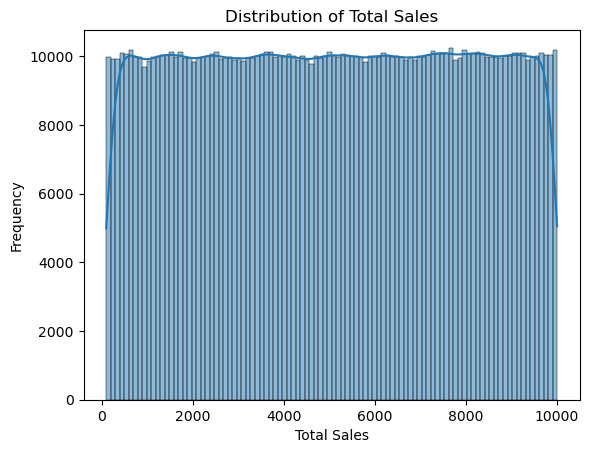


Sales Bucket Distribution:
 Sales_Bucket
Low          250000
Medium       250000
High         250000
Very High    250000
Name: count, dtype: int64

 Cleaned dataset saved as: retail_data_cleaned_classification.csv


In [64]:
# Display initial information
print("Initial shape:", df.shape)
print("\nNull Value Count:\n", df.isnull().sum())

# ----------------------------
# Clean Missing Data
# ----------------------------

# Drop columns with too many missing values (more than 50%)
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

# Fill numerical columns with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows missing critical fields
if 'product_id' in df.columns and 'total_sales' in df.columns:
    df.dropna(subset=['product_id', 'total_sales'], inplace=True)

# ----------------------------
# Remove Duplicates
# ----------------------------
df.drop_duplicates(inplace=True)

# ----------------------------
# Data Type Conversion
# ----------------------------
if 'transaction_date' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# ----------------------------
# Outlier and Distribution Check
# ----------------------------

# Visualize total_sales distribution
sns.histplot(df['total_sales'], bins=100, kde=True)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

# Log transformation suggestion
if df['total_sales'].skew() > 1:
    df['log_total_sales'] = np.log1p(df['total_sales'])
    sns.histplot(df['log_total_sales'], bins=100, kde=True)
    plt.title("Log-Transformed Total Sales")
    plt.xlabel("Log Total Sales")
    plt.ylabel("Frequency")
    plt.show()

# ----------------------------
# Create Categorical Target (Classification)
# ----------------------------
df['Sales_Bucket'] = pd.qcut(df['total_sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Show category distribution
print("\nSales Bucket Distribution:\n", df['Sales_Bucket'].value_counts())

# ----------------------------
# Save Cleaned Dataset for AutoML Classification
# ----------------------------
outfile = 'retail_data_cleaned_classification.csv'
df.to_csv(outfile, index=False)
print(f"\n Cleaned dataset saved as: {outfile}")


Non-numeric columns skipped: ['purchase_frequency']


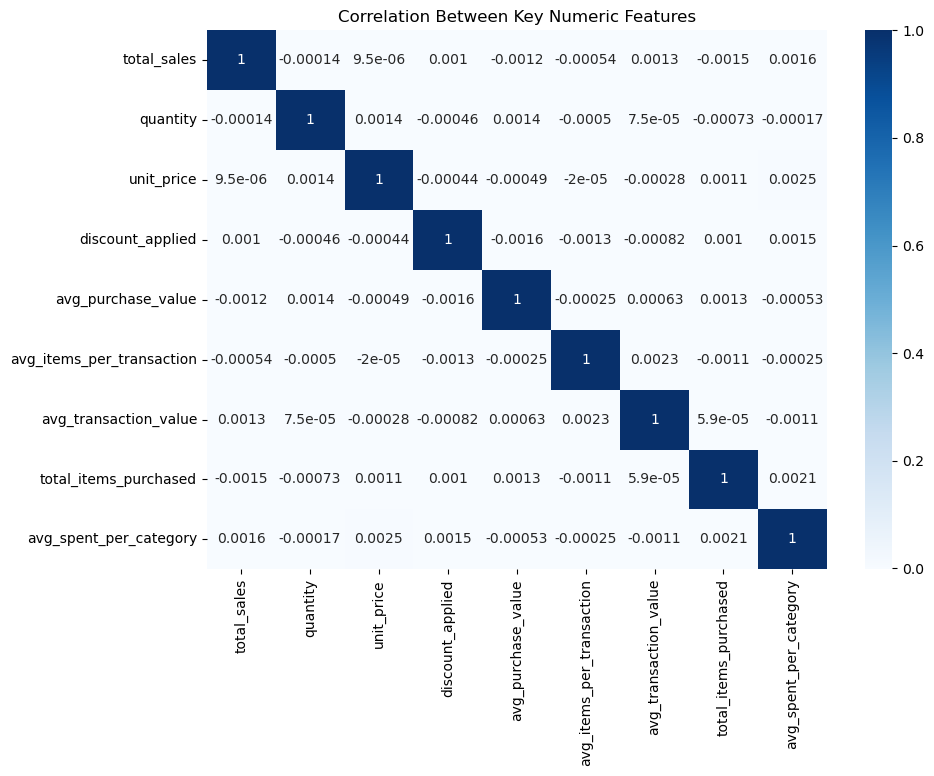

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('retail_data_cleaned_classification.csv')

# Original features you intended to analyze
desired_features = ['total_sales', 'quantity', 'unit_price', 'discount_applied',
                    'avg_purchase_value', 'purchase_frequency', 'avg_items_per_transaction',
                    'avg_transaction_value', 'total_items_purchased', 'avg_spent_per_category']

# Ensure only numeric columns are selected
numeric_features = [col for col in desired_features if pd.api.types.is_numeric_dtype(df[col])]

# Print non-numeric columns for info
non_numeric = [col for col in desired_features if col not in numeric_features]
print("Non-numeric columns skipped:", non_numeric)

# Compute correlations
corr = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Between Key Numeric Features")
plt.show()


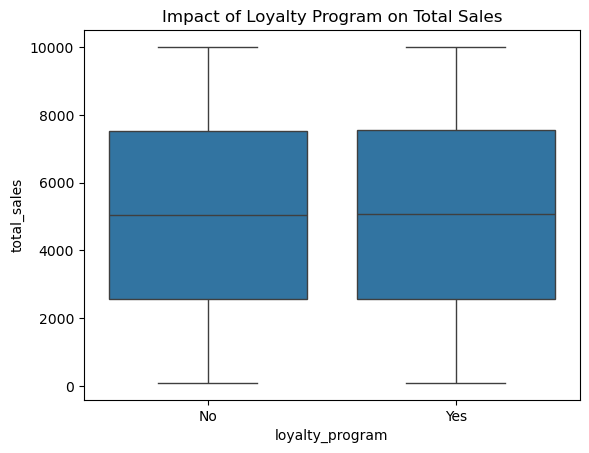

In [70]:
sns.boxplot(x='loyalty_program', y='total_sales', data=df)
plt.title("Impact of Loyalty Program on Total Sales")
plt.show()


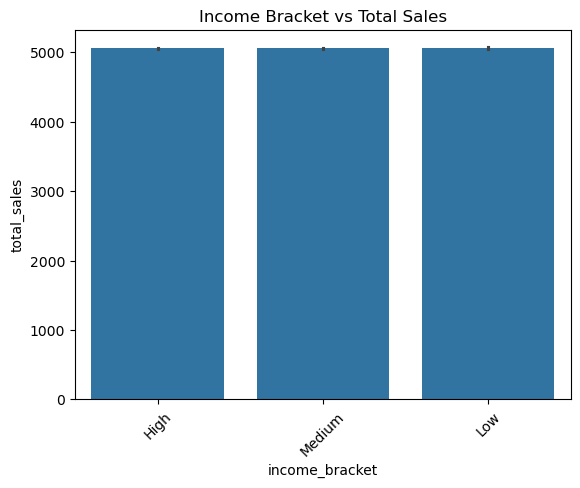

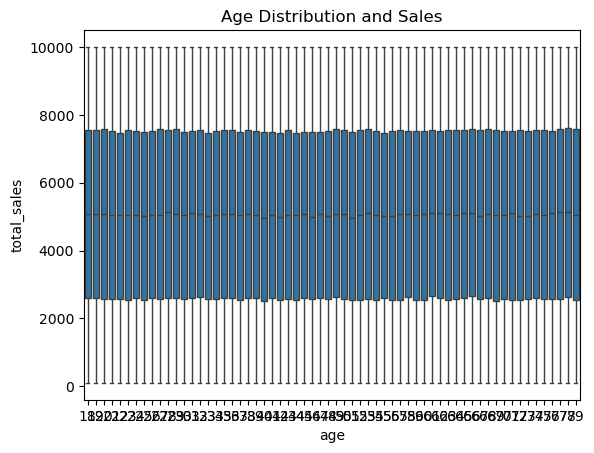

In [72]:
sns.barplot(x='income_bracket', y='total_sales', data=df)
plt.xticks(rotation=45)
plt.title("Income Bracket vs Total Sales")
plt.show()

sns.boxplot(x='age', y='total_sales', data=df)
plt.title("Age Distribution and Sales")
plt.show()


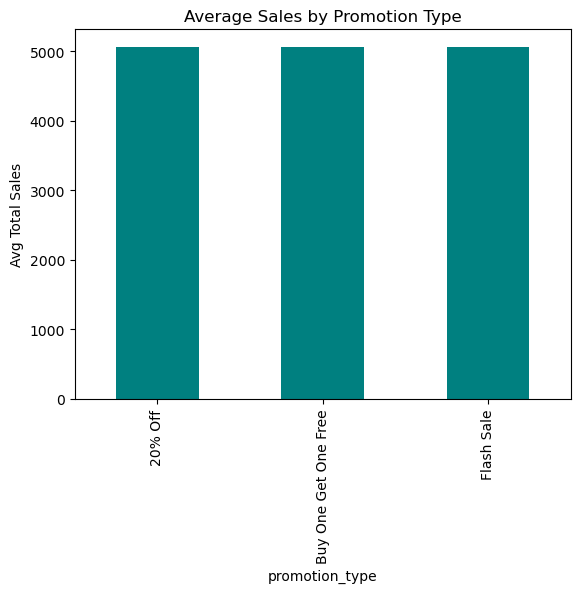

In [74]:
promo_sales = df.groupby('promotion_type')['total_sales'].mean().sort_values(ascending=False)
promo_sales.plot(kind='bar', color='teal')
plt.title("Average Sales by Promotion Type")
plt.ylabel("Avg Total Sales")
plt.show()


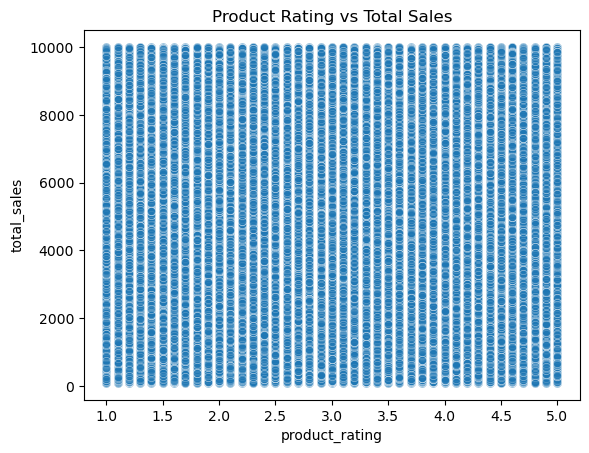

In [76]:
sns.scatterplot(x='product_rating', y='total_sales', data=df, alpha=0.5)
plt.title("Product Rating vs Total Sales")
plt.show()


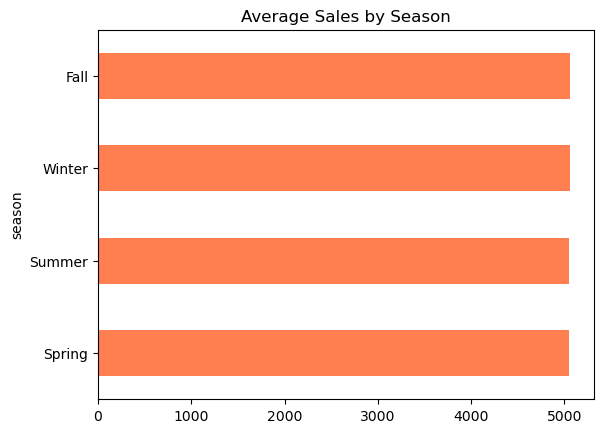

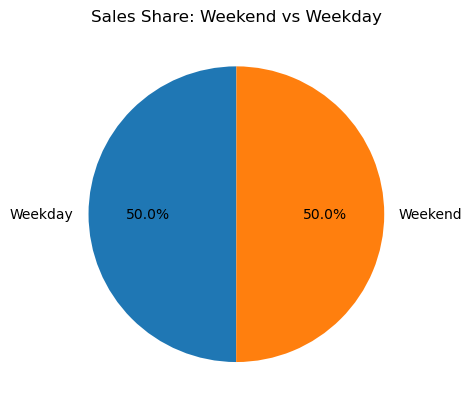

In [78]:
season_sales = df.groupby('season')['total_sales'].mean().sort_values()
season_sales.plot(kind='barh', color='coral')
plt.title("Average Sales by Season")
plt.show()

weekend_sales = df.groupby('weekend')['total_sales'].mean()
weekend_sales.plot(kind='pie', autopct='%1.1f%%', labels=['Weekday', 'Weekend'], startangle=90)
plt.title("Sales Share: Weekend vs Weekday")
plt.ylabel("")
plt.show()
